In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Online retail data


In [3]:
stock_data = pd.read_excel('/content/drive/MyDrive/IEOR4574:Project_1/online_retail_II.xlsx', sheet_name = ['Year 2009-2010','Year 2010-2011'])

In [4]:
stock_data_1 = stock_data.get('Year 2009-2010')

In [5]:
stock_data_2 = stock_data.get('Year 2010-2011')

In [6]:
stock_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
stock_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Invoice statistics

In [8]:
stock_data_1.Invoice.describe()

count     525461
unique     28816
top       537434
freq         675
Name: Invoice, dtype: int64

In [9]:
stock_data_1.Invoice.isnull().values.any()

False

In [ ]:

t = stock_data_1.Invoice.astype('string')

In [ ]:
import re
test = [re.fullmatch("\w+\d{5}?",i) for i in t]
test1 = [re.fullmatch("\d{6}",i) for i in t]
test2 =  [re.fullmatch("\AC\d{6}",i) for i in t]
print(sum(x is not None for x in test))
print(sum(x is not None for x in test1))
print(sum(x is not None for x in test2))

525461
515252
10206


In [ ]:
test3 = [re.fullmatch("\w\d{6}",i) for i in t]
index = []
for i in range(len(test)):
    if test2[i] is None:
        if test3[i] is not None:
            index.append(i)
print(index)

[179403, 276274, 403472]


In [ ]:
stock_data_1.Invoice[179403]

'A506401'

In [ ]:
stock_data_1.Invoice[276274]

'A516228'

In [ ]:
stock_data_1.Invoice[403472]

'A528059'

In [ ]:
stock_data_2.Invoice.describe()

count     541910
unique     25900
top       573585
freq        1114
Name: Invoice, dtype: int64

In [ ]:
stock_data_2.Invoice.isnull().values.any()

False

In [ ]:
t = stock_data_2.Invoice.astype('string')

In [ ]:
test = [re.fullmatch("\w+\d{5}?",i) for i in t]
test1 = [re.fullmatch("\d{6}",i) for i in t]
test2 =  [re.fullmatch("\AC\d{6}",i) for i in t]
print(sum(x is not None for x in test))
print(sum(x is not None for x in test1))
print(sum(x is not None for x in test2))

541910
532619
9288


In [ ]:
test3 = [re.fullmatch("\w\d{6}",i) for i in t]
index = []
for i in range(len(test)):
    if test2[i] is None:
        if test3[i] is not None:
            index.append(i)
print(index)

[299982, 299983, 299984]


In [ ]:
stock_data_2.iloc[[299982]]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [ ]:
stock_data_2.Invoice[299983]

'A563186'

In [ ]:
stock_data_2.Invoice[299984]

'A563187'

stockcode

In [ ]:
stock_data_1.StockCode.describe()

count     525461
unique      4632
top       85123A
freq        3516
Name: StockCode, dtype: object

In [ ]:

t = stock_data_1.StockCode.astype('string')

In [ ]:
test = [re.fullmatch("\w{5}",i) for i in t]
print(sum(x is not None for x in test))

445349


In [ ]:
test1 = [re.fullmatch("\w{6}",i) for i in t]
print(sum(x is not None for x in test))

445349


Check if Description the same, then StockCode the same?

In [ ]:
a = stock_data_1.groupby('StockCode').count()

In [ ]:
a

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
10002,327,327,327,327,327,275,327
10080,7,6,7,7,7,6,7
10109,2,1,2,2,2,1,2
10120,49,49,49,49,49,37,49
10125,87,87,87,87,87,69,87
...,...,...,...,...,...,...,...
gift_0001_60,2,0,2,2,2,0,2
gift_0001_70,3,1,3,3,3,0,3
gift_0001_80,4,2,4,4,4,0,4


In [ ]:
b = stock_data_2.groupby('StockCode').count()

In [ ]:
b

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
10002,73,71,73,73,73,49,73
10080,24,23,24,24,24,21,24
10120,30,30,30,30,30,30,30
10125,94,94,94,94,94,64,94
10133,200,200,200,200,200,125,200
...,...,...,...,...,...,...,...
gift_0001_20,10,10,10,10,10,0,10
gift_0001_30,8,7,8,8,8,0,8
gift_0001_40,3,3,3,3,3,0,3


amass sales data by date instead of datetime


In [ ]:
stock_data_1['total_sales'] = stock_data_1.Quantity * stock_data_1.Price

In [ ]:
c = stock_data_1.copy()

In [ ]:
c['InvoiceDate'] = pd.to_datetime(c['InvoiceDate']).dt.date

In [ ]:
c.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


In [ ]:
c = c.groupby('InvoiceDate').sum().total_sales

In [ ]:
stock_data_2['total_sales'] = stock_data_2.Quantity * stock_data_2.Price

In [ ]:
d = stock_data_2.copy()

In [ ]:
d['InvoiceDate'] = pd.to_datetime(d['InvoiceDate']).dt.date

In [ ]:
d = d.groupby('InvoiceDate').sum().total_sales

In [ ]:
e = pd.concat([c,d],axis = 0)
e = e.drop_duplicates(keep='first')

In [ ]:
e

InvoiceDate
2009-12-01    53173.03
2009-12-02    62763.59
2009-12-03    68093.05
2009-12-04    40346.40
2009-12-05     9803.05
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32149.53
Name: total_sales, Length: 604, dtype: float64

stationarity check

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(e)

Results of Dickey-Fuller Test:
Test Statistic                  -2.075961
p-value                          0.254290
#Lags Used                      18.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64


**Proved to be not stationary!**

In [ ]:
e.head(40)

InvoiceDate
2009-12-01    53173.030
2009-12-02    62763.590
2009-12-03    68093.050
2009-12-04    40346.400
2009-12-05     9803.050
2009-12-06    24317.200
2009-12-07    44337.020
2009-12-08    43743.140
2009-12-09    40396.550
2009-12-10    43342.480
2009-12-11    38424.920
2009-12-13    22065.990
2009-12-14    72898.240
2009-12-15    47636.660
2009-12-16    52681.200
2009-12-17    29317.790
2009-12-18    42371.080
2009-12-20    11335.230
2009-12-21    14576.070
2009-12-22    27481.740
2009-12-23    10742.680
2010-01-04    13200.600
2010-01-05    19102.340
2010-01-06     8746.180
2010-01-07    72307.920
2010-01-08    29516.630
2010-01-10    23519.920
2010-01-11    37492.390
2010-01-12    40690.830
2010-01-13    19399.930
2010-01-14    28543.280
2010-01-15    13298.540
2010-01-17    17565.940
2010-01-18    21343.230
2010-01-19    32987.871
2010-01-20    16739.510
2010-01-21    26967.890
2010-01-22    34695.190
2010-01-24    16043.850
2010-01-25    22803.360
Name: total_sales, dtype: fl

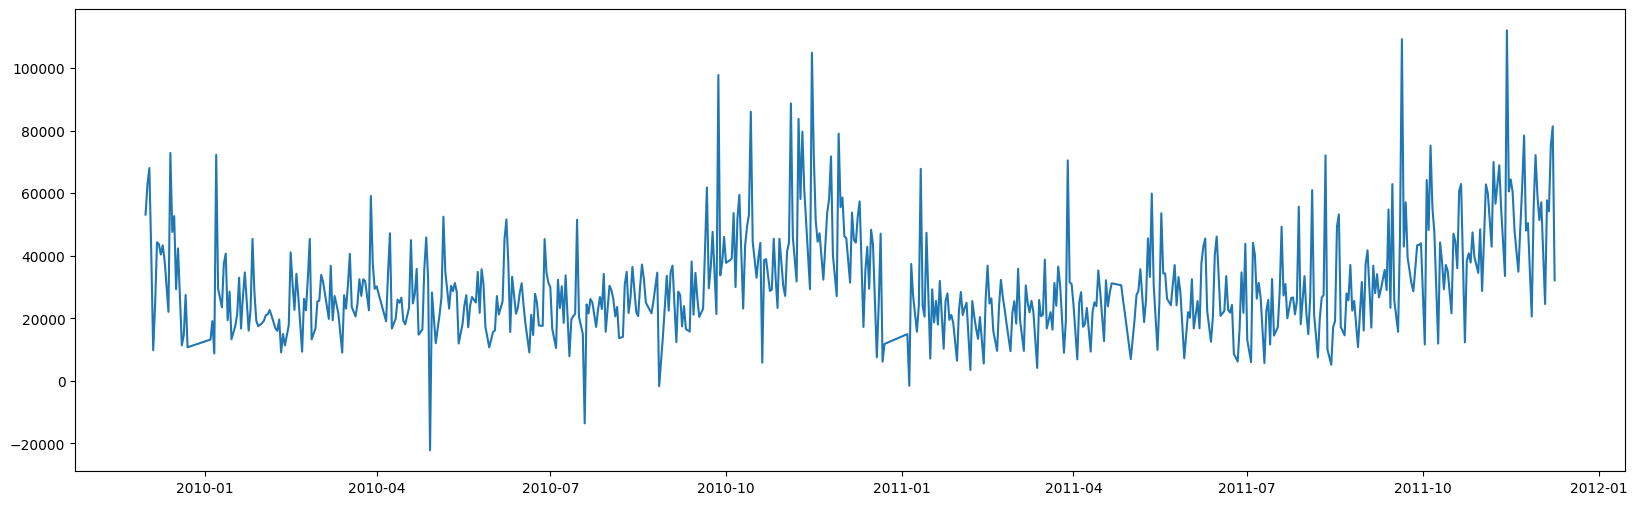

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(e.index,e)

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

<Figure size 2000x700 with 0 Axes>

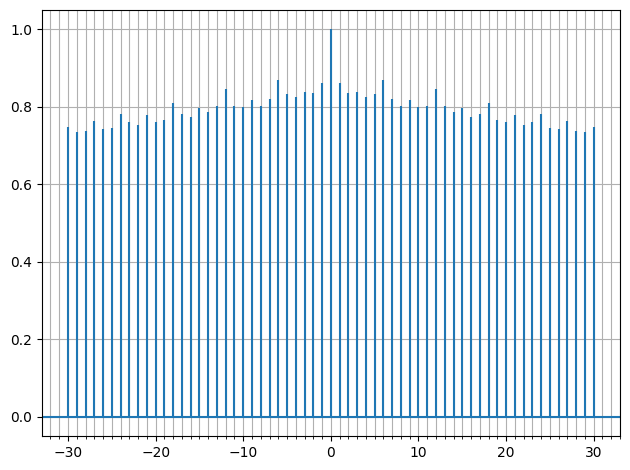

In [ ]:
# plt.grid(True)
plt.figure(figsize=(20, 7))
fig, ax = plt.subplots()
ax.acorr(e, maxlags = 30)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
# plt.legend(['$R_X$(\u03C4)'],loc='upper left')
# plt.xlabel('\u03C4')
# plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.show()

Period = 6, weekly change



<Figure size 2000x700 with 0 Axes>

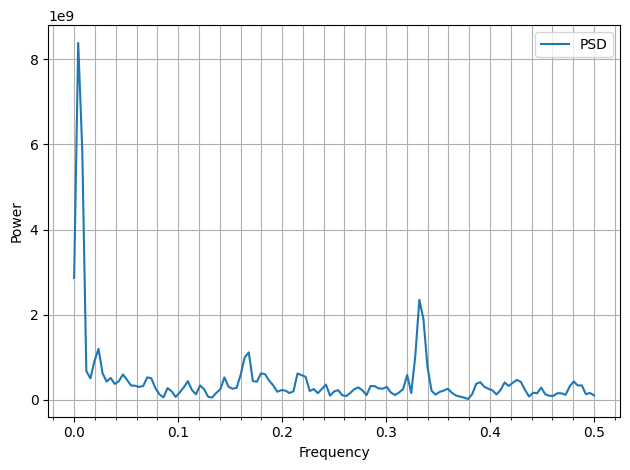

In [ ]:
freqs, psd = signal.welch(e)
plt.figure(figsize=(20, 7))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
ax.grid(True, which='both')
plt.tight_layout()
fig.show()

Frequency 0.34 -> period 3


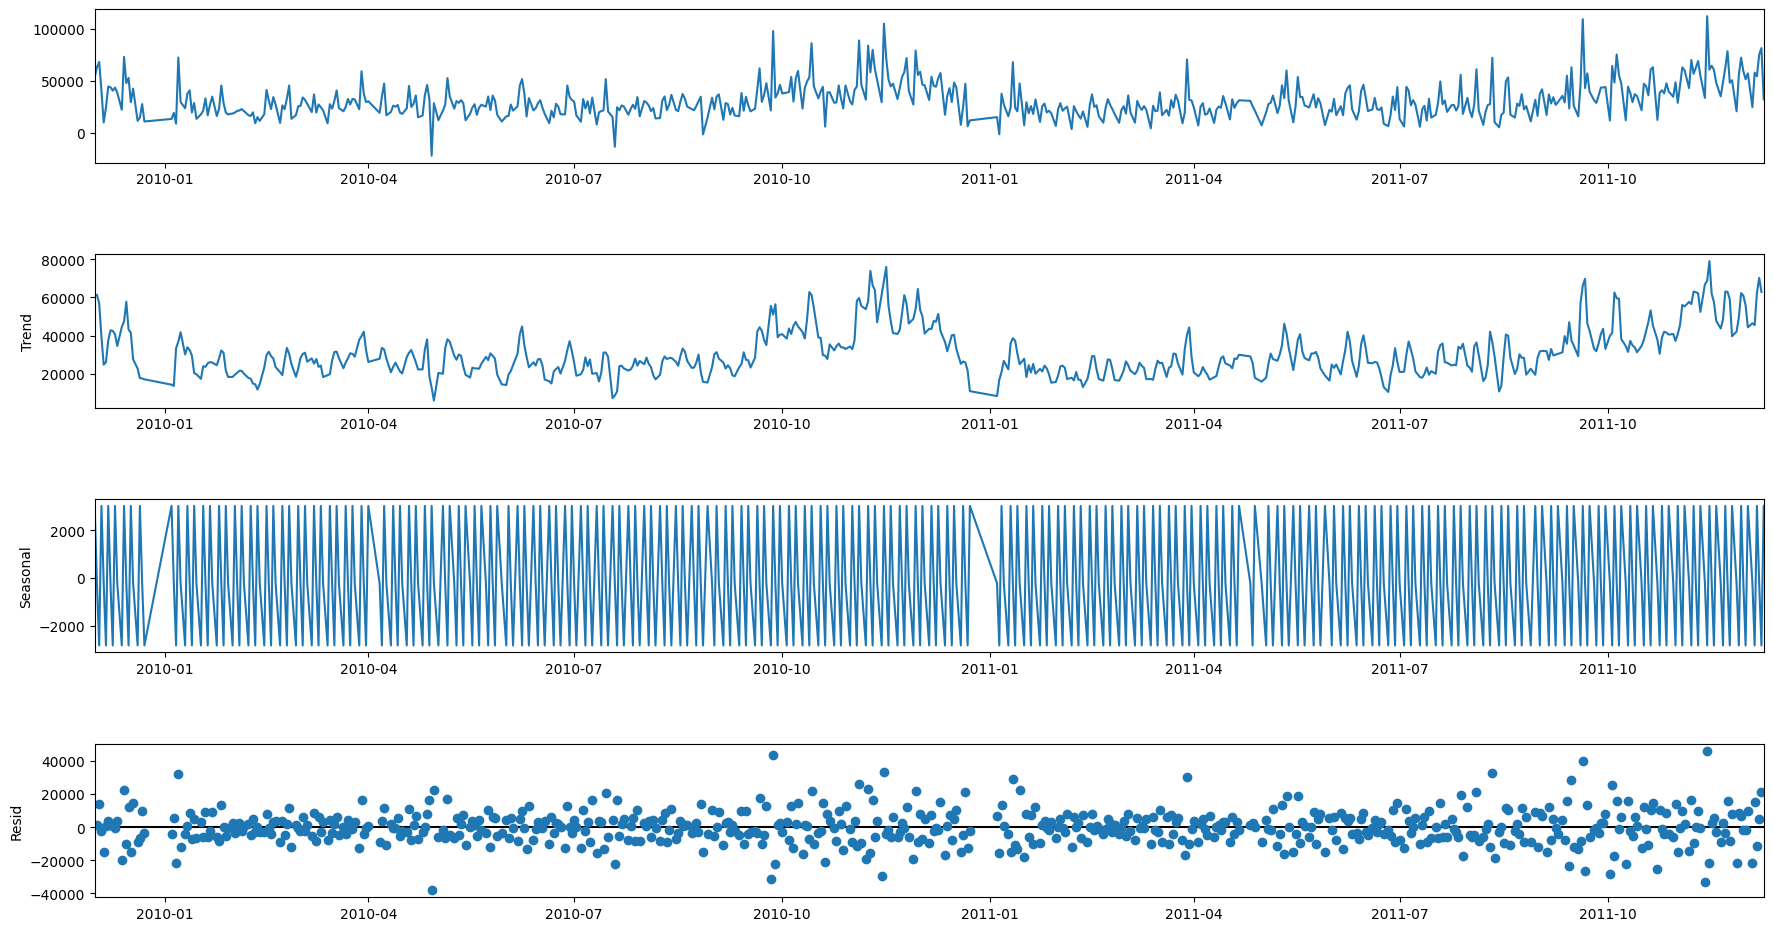

In [ ]:
# Overview of trend, seasonality and residual errors 
from statsmodels.tsa.seasonal import seasonal_decompose
z = e.copy()
z = pd.DataFrame({
    'values': z
}, index=pd.DatetimeIndex(z.index))
decomp = seasonal_decompose(z,period = 3)
fig = decomp.plot()
fig.set_size_inches(20,10)

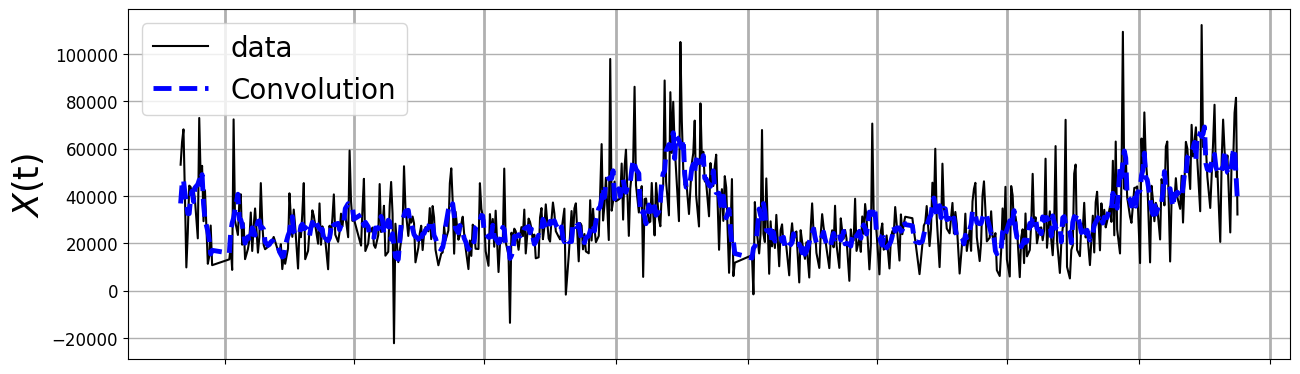

In [ ]:
# convolution
t = e.index
filtered = signal.convolve(e, [1/5,1/5,1/5,1/5,1/5], mode='same')
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(211)
plt.plot(t, e,'k')
plt.plot(t, filtered,'--b',linewidth=3.5)
# plt.xlim(0, 100)
# plt.ylim(50, 150)
plt.ylabel('$X$(t)',fontsize=25)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax1.xaxis.grid(linewidth=2)
ax1.yaxis.grid(linewidth=1)
ax1.legend(['data','Convolution'],fontsize=20)

In [ ]:
# MA
f = pd.DataFrame(e)
f = np.concatenate(f.rolling(18).mean().values.tolist(), axis = 0)

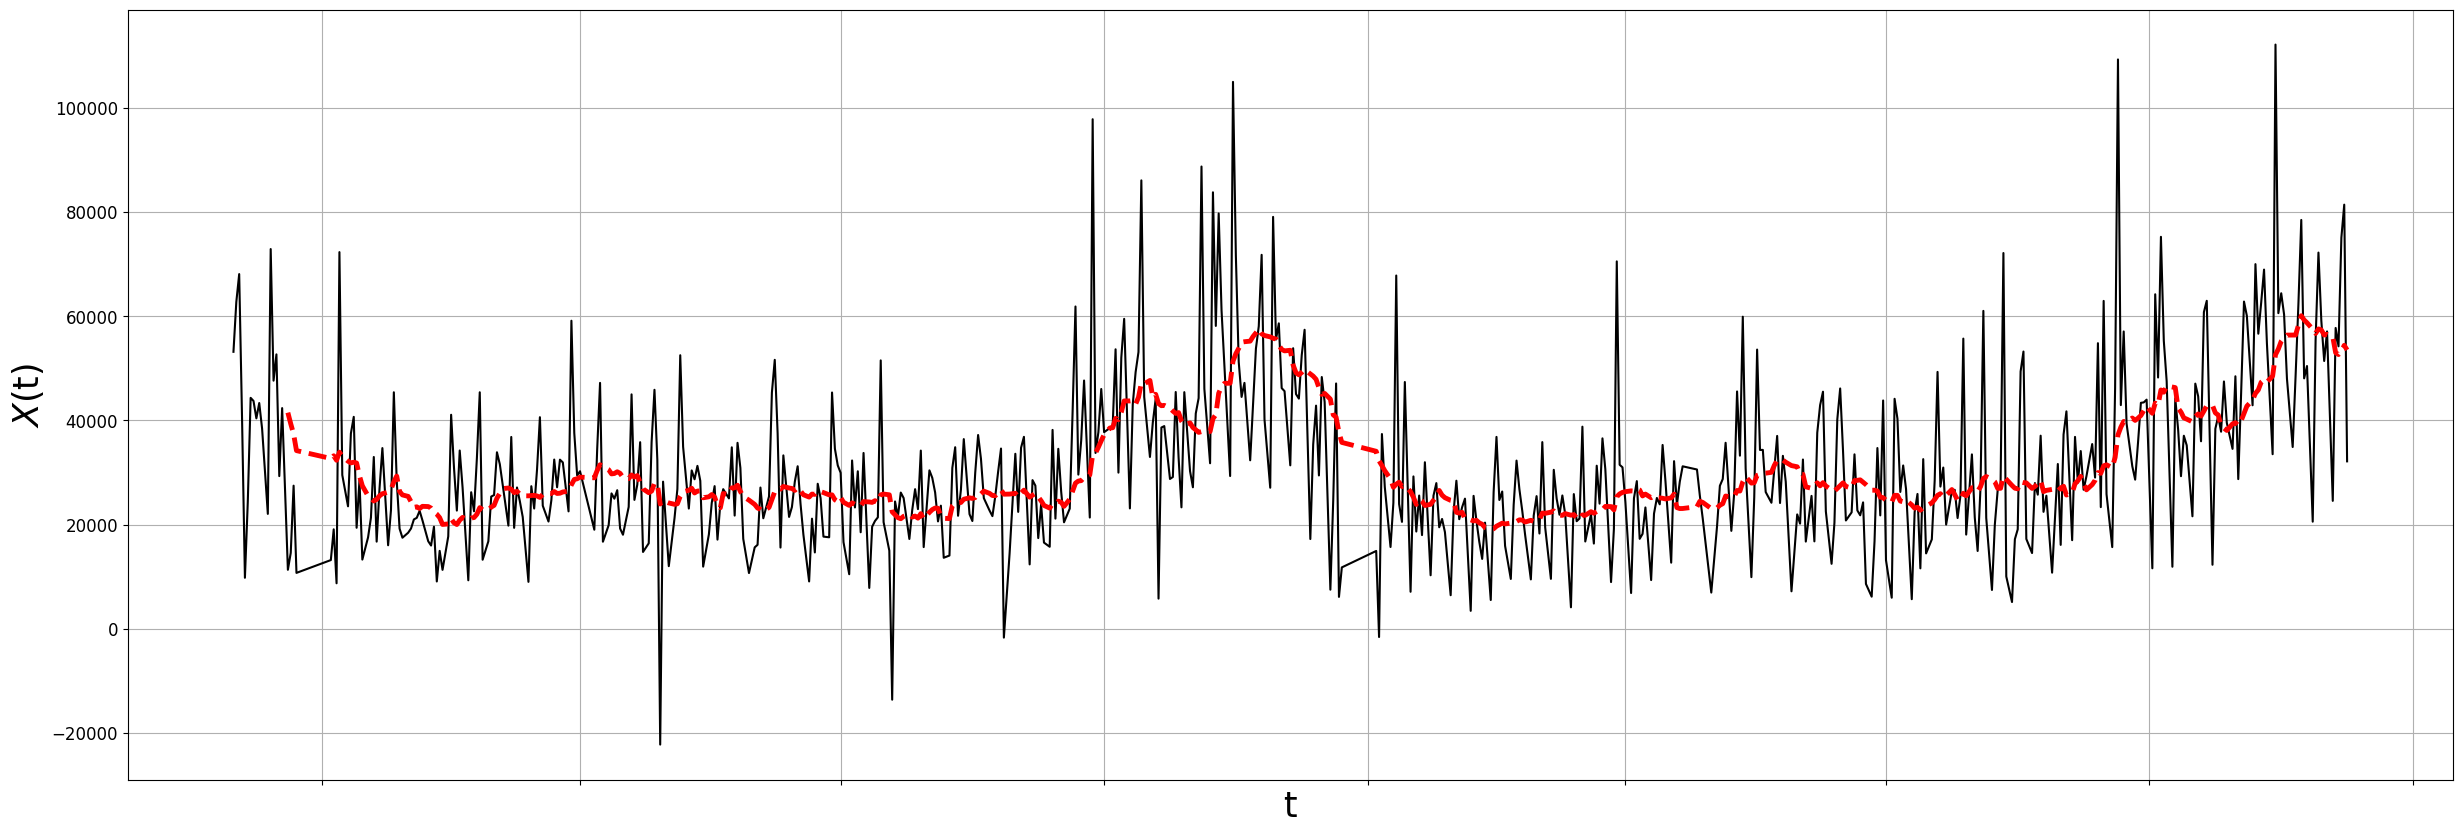

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(t, e,'k')
plt.plot(t, f,'--r',linewidth=3.5)
# plt.xlim(0, 100)
# plt.ylim(50, 150)
plt.ylabel('$X$(t)',fontsize=25)
plt.xlabel('t',fontsize=25)
plt.tick_params('x', labelbottom=False)
plt.yticks(fontsize=12)
ax.xaxis.grid(linewidth=2)
ax.yaxis.grid(linewidth=1)
ax.legend(['data','MA 5'],fontsize=20)
plt.grid(True)
plt.show()

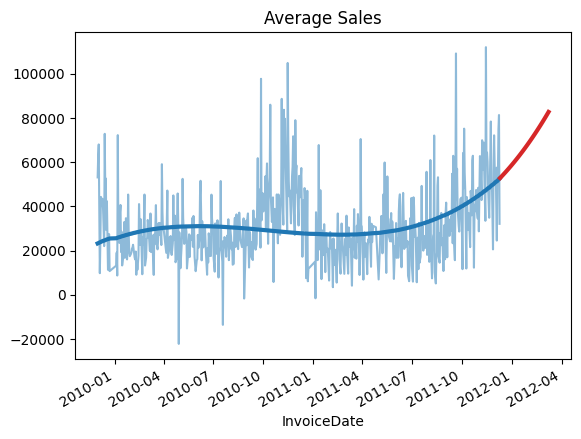

In [ ]:
# forecasting trends with high-order polynomials
from statsmodels.tsa.deterministic import DeterministicProcess
e = e.drop_duplicates(keep='first')
dp = DeterministicProcess(
    index = pd.DatetimeIndex(e.index).to_period(freq='D'),
    constant = False,
    order = 3,
    drop = True,
)
X = dp.in_sample()
# X.index = pd.DatetimeIndex(X.index)
X_fore = dp.out_of_sample(steps=90)
model = LinearRegression()
model.fit(X, e)
y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
ax = e.plot(alpha=0.5, title="Average Sales")
ax = y_pred.plot(ax=ax, linewidth=3, color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')


<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

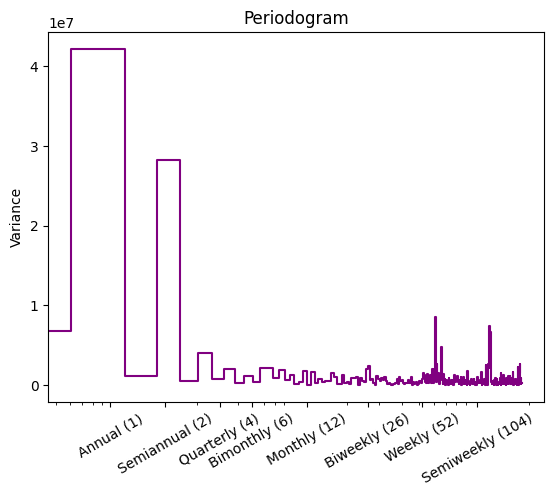

In [ ]:
# tease out seasonality
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax
plot_periodogram(e)

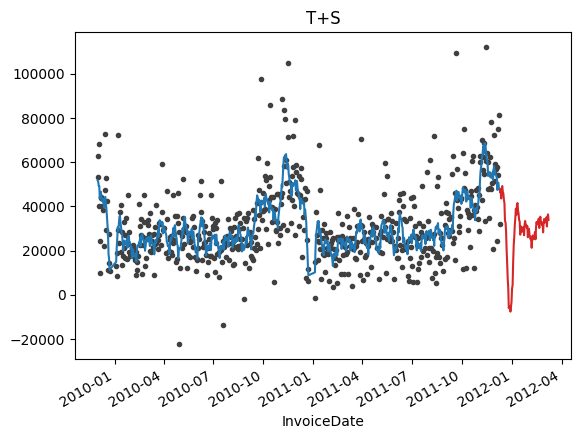

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq="A", order=26)
dp = DeterministicProcess(
    index= pd.DatetimeIndex(e.index).to_period(freq='D'),
    constant=True,               # dummy feature for bias (y-intercept)
    order=3,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=90)
model = LinearRegression(fit_intercept=False)
model.fit(X, e)
y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
ax = e.plot(color='0.25', style='.', title='T+S')
ax = y_pred.plot(ax=ax, label="Trend+Seasonal")
ax = y_fore.plot(ax=ax, label="Trend+Seasonal Forecast", color='C3')

In [ ]:
X.index

PeriodIndex(['2009-12-01', '2009-12-02', '2009-12-03', '2009-12-04',
             '2009-12-05', '2009-12-06', '2009-12-07', '2009-12-08',
             '2009-12-09', '2009-12-10',
             ...
             '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
             '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
             '2011-12-08', '2011-12-09'],
            dtype='period[D]', name='InvoiceDate', length=604)

In [ ]:
# take holidays into consideration
# create holidays feature in data
g = pd.DataFrame({'InvoiceDate':pd.to_datetime(['2009-12-14','2009-12-15','2009-12-16','2009-12-17','2009-12-18','2009-12-19','2009-12-20', '2009-12-21','2009-12-22','2009-12-23','2010-12-14','2010-12-15','2010-12-16','2010-12-17','2010-12-18','2010-12-19','2010-12-20', '2010-12-21','2010-12-22','2010-12-23']), 'Holidays description': 'Pre-Christmas'})
h = pd.DataFrame({'InvoiceDate':pd.to_datetime(['2010-01-07','2010-01-08','2010-01-09','2010-01-10','2010-01-11','2011-01-07','2011-01-08','2011-01-09','2011-01-10','2011-01-11']), 'Holidays description': 'Post New Year'})

In [ ]:
holiday = pd.concat([g,h], ignore_index=True)

In [ ]:
holiday.set_index('InvoiceDate', inplace = True)

In [ ]:
holiday = holiday.sort_index()

In [ ]:
holiday.index = holiday.index.to_period("D")

In [ ]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 30 entries, 2009-12-14 to 2011-01-11
Freq: D
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Holidays description  30 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


In [ ]:
holiday = pd.get_dummies(holiday)

In [ ]:
# X_holiday.columns

In [ ]:
# X_holiday['Holidays description_Post New Year'] = pd.to_numeric(X_holiday['Holidays description_Post New Year'])
# X_holiday['Holidays description_Pre-Christmas'] = pd.to_numeric(X_holiday['Holidays description_Pre-Christmas'])

In [ ]:
holiday.index

PeriodIndex(['2009-12-14', '2009-12-15', '2009-12-16', '2009-12-17',
             '2009-12-18', '2009-12-19', '2009-12-20', '2009-12-21',
             '2009-12-22', '2009-12-23', '2010-01-07', '2010-01-08',
             '2010-01-09', '2010-01-10', '2010-01-11', '2010-12-14',
             '2010-12-15', '2010-12-16', '2010-12-17', '2010-12-18',
             '2010-12-19', '2010-12-20', '2010-12-21', '2010-12-22',
             '2010-12-23', '2011-01-07', '2011-01-08', '2011-01-09',
             '2011-01-10', '2011-01-11'],
            dtype='period[D]', name='InvoiceDate')

In [ ]:
X2 = X.join(holiday, on = 'InvoiceDate').fillna(0.0)

In [ ]:
X2['Holidays description_Post New Year'].head(30)

InvoiceDate
2009-12-01    0.0
2009-12-02    0.0
2009-12-03    0.0
2009-12-04    0.0
2009-12-05    0.0
2009-12-06    0.0
2009-12-07    0.0
2009-12-08    0.0
2009-12-09    0.0
2009-12-10    0.0
2009-12-11    0.0
2009-12-13    0.0
2009-12-14    0.0
2009-12-15    0.0
2009-12-16    0.0
2009-12-17    0.0
2009-12-18    0.0
2009-12-20    0.0
2009-12-21    0.0
2009-12-22    0.0
2009-12-23    0.0
2010-01-04    0.0
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    1.0
2010-01-08    1.0
2010-01-10    1.0
2010-01-11    1.0
2010-01-12    0.0
2010-01-13    0.0
Freq: D, Name: Holidays description_Post New Year, dtype: float64

In [ ]:
X_fore.index.set_names('InvoiceDate', inplace = True)

In [ ]:
X_fore_2 = X_fore.merge(holiday, on='InvoiceDate', how='left').fillna(0.0)

In [ ]:
X2.head(30)

,const,trend,trend_squared,trend_cubed,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)",...,"sin(23,freq=A-DEC)","cos(23,freq=A-DEC)","sin(24,freq=A-DEC)","cos(24,freq=A-DEC)","sin(25,freq=A-DEC)","cos(25,freq=A-DEC)","sin(26,freq=A-DEC)","cos(26,freq=A-DEC)",Holidays description_Post New Year,Holidays description_Pre-Christmas
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2009-12-01,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.288482,0.957485,-0.238673,0.971100,-0.699458,0.714673,-0.965740,0.259512,0.0,0.0
2009-12-02,1.0,2.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.635432,0.772157,0.171293,0.985220,-0.337523,0.941317,-0.758306,0.651899,0.0,0.0
2009-12-03,1.0,3.0,9.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.884068,0.467359,0.552435,0.833556,0.085965,0.996298,-0.401488,0.915864,0.0,0.0
2009-12-04,1.0,4.0,16.0,64.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.995919,0.090252,0.840618,0.541628,0.493776,0.869589,0.034422,0.999407,0.0,0.0
2009-12-05,1.0,5.0,25.0,125.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.953681,-0.300820,0.987349,0.158559,0.811539,0.584298,0.463550,0.886071,0.0,0.0
2009-12-06,1.0,6.0,36.0,216.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.763889,-0.645348,0.967938,-0.251190,0.981306,0.192452,0.801361,0.598181,0.0,0.0
2009-12-07,1.0,7.0,49.0,343.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.455907,-0.890028,0.785650,-0.618671,0.972118,-0.234491,0.981306,0.192452,0.0,0.0
2009-12-08,1.0,8.0,64.0,512.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.077386,-0.997001,0.471160,-0.882048,0.785650,-0.618671,0.967938,-0.251190,0.0,0.0
2009-12-09,1.0,9.0,81.0,729.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.313107,-0.949718,0.077386,-0.997001,0.455907,-0.890028,0.763889,-0.645348,0.0,0.0


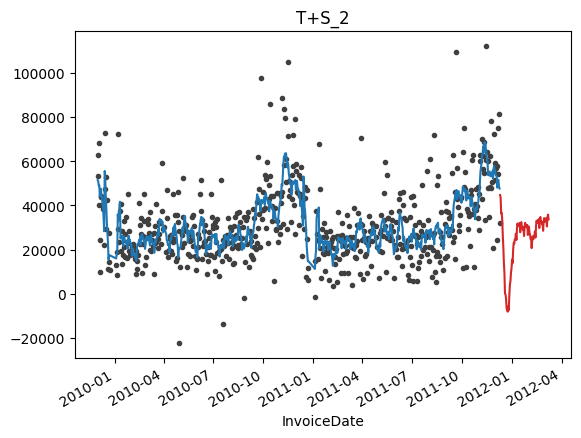

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X2, e)
y_pred = pd.Series(model.predict(X2), index=X2.index)
y_fore = pd.Series(model.predict(X_fore_2), index=X_fore_2.index)
ax1 = e.plot(color='0.25', style='.', title='T+S_2')
ax1 = y_pred.plot(ax=ax1, label="Trend+Seasonal")
ax1 = y_fore.plot(ax=ax1, label="Trend+Seasonal Forecast", color='C3')

In [ ]:
#SARIMAX
#(p, d, q) * (P, D, Q, s)
# d & D have to be trial and error
#

import time
start = time.time()

# function to create all combinations of differencing orders as needed
def differencing(timeseries, m):
    info = []
    
    # "general" differencing only (d = 0 or 1 or 2)
    for i in range(3):
        timeseries.name = f"d{i}_D0_m0"
        info.append(timeseries)
        timeseries = timeseries.diff()
    
    # seasonal differencing (D = 1) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j].diff(periods=i)
            timeseries.name = f"d{j}_D1_m{i}"
            info.append(timeseries)
    
    # seasonal differencing (D = 2) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D2_m{i}"
            info.append(timeseries)
        
    return pd.DataFrame(info).T
diff_series = differencing(e, [12])
diff_series

,d0_D0_m0,d1_D0_m0,d2_D0_m0,d0_D1_m12,d1_D1_m12,d2_D1_m12,d0_D2_m12,d1_D2_m12,d2_D2_m12
InvoiceDate,,,,,,,,,
2009-12-01,53173.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-02,62763.59,9590.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-03,68093.05,5329.46,-4261.10,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-04,40346.40,-27746.65,-33076.11,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-05,9803.05,-30543.35,-2796.70,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011-12-05,57751.32,33185.54,65705.82,9448.82,19785.05,39175.54,31147.40,33473.24,56903.30
2011-12-06,54228.37,-3522.95,-36708.49,-8078.95,-17527.77,-37312.82,-13738.61,-44886.01,-78359.25
2011-12-07,75076.22,20847.85,24370.80,-3404.48,4674.47,22202.24,-19285.75,-5547.14,39338.87


In [ ]:
def adf_summary(diff_series):
    from statsmodels.tsa.stattools import adfuller
    summary = []
    
    for i in diff_series:
        # unpack the results
        a, b, c, d, e, f = adfuller(diff_series[i].dropna())
        g, h, i = e.values()
        results = [a, b, c, d, g, h, i]
        summary.append(results)
    
    columns = ["Test Statistic", "p-value", "#Lags Used", "No. of Obs. Used",
               "Critical Value (1%)", "Critical Value (5%)", "Critical Value (10%)"]
    index = diff_series.columns
    summary = pd.DataFrame(summary, index=index, columns=columns)
    
    return summary

summary = adf_summary(diff_series)

# filter away results that are not stationary
summary_passed = summary[summary["p-value"] < 0.05]
summary_passed

# output indices as a list
index_list = pd.Index.tolist(summary_passed.index)

# use the list as a condition to select stationary time-series
passed_series = diff_series[index_list]

# sort the columns by names
ps = passed_series.sort_index(axis=1)
summary

,Test Statistic,p-value,#Lags Used,No. of Obs. Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
d0_D0_m0,-2.075961,2.542900e-01,18,585,-3.441578,-2.866493,-2.569408
d1_D0_m0,-7.706146,1.300056e-11,17,585,-3.441578,-2.866493,-2.569408
d2_D0_m0,-12.086310,2.173512e-22,19,582,-3.441636,-2.866519,-2.569422
d0_D1_m12,-5.380110,3.728728e-06,18,573,-3.441814,-2.866597,-2.569463
d1_D1_m12,-11.223171,1.990167e-20,16,574,-3.441794,-2.866588,-2.569459
d2_D1_m12,-11.483270,4.935113e-21,19,570,-3.441875,-2.866624,-2.569478
d0_D2_m12,-6.527891,1.003911e-08,18,561,-3.442060,-2.866706,-2.569521
d1_D2_m12,-12.363571,5.477534e-23,16,562,-3.442039,-2.866697,-2.569516
d2_D2_m12,-11.678219,1.766994e-21,19,558,-3.442124,-2.866734,-2.569536


<Axes: title={'center': 'Possible MA Terms'}, xlabel='nth lag', ylabel='Sum of ACF'>

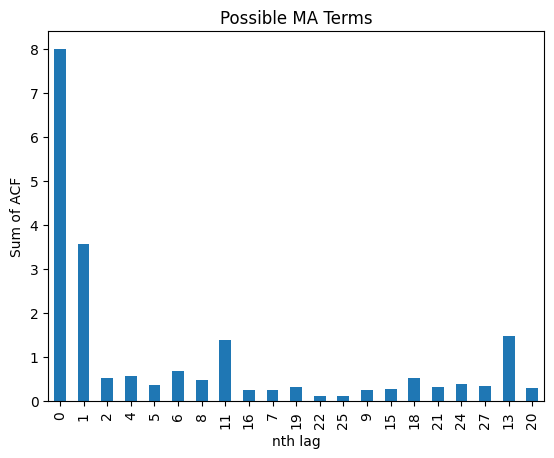

In [ ]:
from statsmodels.tsa.stattools import pacf
df_sp_p = pd.DataFrame()
AR = []
for i in ps:
    # unpack the results into PACF and their CI
    PACF, PACF_ci = pacf(ps[i].dropna(), alpha=0.05, method='ywm')
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    PACF_ci_ll = PACF_ci[:,0] - PACF
    PACF_ci_ul = PACF_ci[:,1] - PACF
    
    # find positions of significant spikes ~ possible value of p & P
    sp1 = np.where(PACF < PACF_ci_ll)[0]
    sp2 = np.where(PACF > PACF_ci_ul)[0]
    
    # PACF values of the significant spikes
    sp1_value = abs(PACF[PACF < PACF_ci_ll])
    sp2_value = PACF[PACF > PACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_p = pd.concat((df_sp_p, sp1_series, sp2_series), axis=1)


# store all values of significant spikes by nlags in ACF plots
from statsmodels.tsa.stattools import acf

# create an empty dataframe to store values
df_sp_q = pd.DataFrame()
MA = []
for i in ps:
    # unpack the results into ACF and their CI
    ACF, ACF_ci = acf(ps[i].dropna(), alpha=0.05)
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    ACF_ci_ll = ACF_ci[:,0] - ACF
    ACF_ci_ul = ACF_ci[:,1] - ACF
    
    # find positions of significant spikes ~ possible value of q & Q
    sp1 = np.where(ACF < ACF_ci_ll)[0]
    sp2 = np.where(ACF > ACF_ci_ul)[0]
    
    # ACF values of the significant spikes
    sp1_value = abs(ACF[ACF < ACF_ci_ll])
    sp2_value = ACF[ACF > ACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_q = pd.concat((df_sp_q, sp1_series, sp2_series), axis=1)


# visualize sums of values of significant spikes by nlags in ACF plots
df_sp_q.iloc[1:].T.sum().plot(kind='bar', title='Possible MA Terms', xlabel='nth lag', ylabel='Sum of ACF')



<Axes: title={'center': 'Possible AR Terms'}, xlabel='nth lag', ylabel='Sum of PACF'>

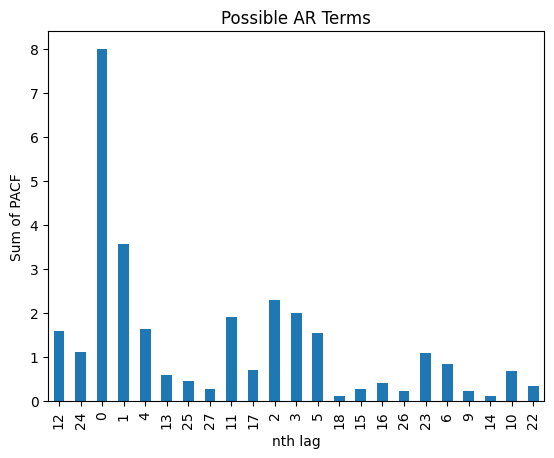

In [ ]:
# visualize sums of values of significant spikes by nlags in PACF plots
df_sp_p.iloc[1:].T.sum().plot(kind='bar', title='Possible AR Terms', xlabel='nth lag', ylabel='Sum of PACF')


In [ ]:
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm
    

# possible values of the parameters
p = [1, 2, 3, 4, 5]
d = [1, 2]
q = [1, 11]
P = [1]
D = [0, 1, 2]
Q = [1]
m = [12]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [ ]:
def SARIMA_grid(endog, order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    # filter away errors & warnings due to failture to converge, LU decomposition errors, etc
    import warnings
    warnings.simplefilter("ignore")
    
    #fit the model
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
            
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order", "seasonal_order", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info

In [ ]:
train = e.iloc[:int(len(e)*0.8)]
test = e.iloc[int(len(e)*0.8):]

In [ ]:
# fit all combinations into the model
model_info = SARIMA_grid(endog=train, order=pdq, seasonal_order=PDQm)

end = time.time()
print(f'time required: {end - start}')

# save the results
model_info.to_csv(path_or_buf='sarima_semi_model.csv')

time required: 1103.3980751037598


In [ ]:
# 10 least MAPE models
least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

,order,seasonal_order,MAPE,RMSE,AIC,BIC
27,"[3, 1, 11]","[1, 0, 1, 12]",0.320333,12441.782714,10488.146288,10559.171338
51,"[5, 1, 11]","[1, 0, 1, 12]",0.321384,12393.423622,10488.214513,10567.595451
33,"[3, 2, 11]","[1, 0, 1, 12]",0.321820,12919.351729,10490.880052,10561.869795
39,"[4, 1, 11]","[1, 0, 1, 12]",0.324307,12429.154241,10488.777737,10563.980732
15,"[2, 1, 11]","[1, 0, 1, 12]",0.324782,12435.003676,10486.050890,10552.897996
57,"[5, 2, 11]","[1, 0, 1, 12]",0.325621,12947.118476,10491.254192,10570.595670
45,"[4, 2, 11]","[1, 0, 1, 12]",0.330947,12938.261704,10493.453193,10568.618804
21,"[2, 2, 11]","[1, 0, 1, 12]",0.331903,12972.270522,10492.614876,10559.428752
9,"[1, 2, 11]","[1, 0, 1, 12]",0.332025,13024.591594,10526.599467,10589.237476
3,"[1, 1, 11]","[1, 0, 1, 12]",0.332236,12529.346998,10494.592737,10557.261898


In [ ]:
test.index = pd.to_datetime(test.index)

In [ ]:
test.index = test.index.to_period("D")

In [ ]:
train.index = pd.to_datetime(train.index)

In [ ]:
train.index = train.index.to_period("D")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
gd_mod_cv = []
for i in least_MAPE.index:
    model = SARIMAX(endog=train, order=least_MAPE.order[i],
                    seasonal_order=least_MAPE.seasonal_order[i])
    result = model.fit()
    pred = result.get_prediction(start = test.index[0], end =test.index[-1]).summary_frame()['mean']
    CV_MAPE = (abs((test-pred))/(test)).mean()
    cv_result = [least_MAPE.order[i], least_MAPE.seasonal_order[i], CV_MAPE]
    gd_mod_cv.append(cv_result)

columns = ['order', 'seasonal_order', 'CV_MAPE']
index = least_MAPE.index
gd_mod_cv = pd.DataFrame(data=gd_mod_cv, index=index, columns=columns)


# Cross-validation results of the models
pd.concat((least_MAPE, gd_mod_cv.iloc[:,2:]), axis=1).sort_values('CV_MAPE')

,order,seasonal_order,MAPE,RMSE,AIC,BIC,CV_MAPE
27,"[3, 1, 11]","[1, 0, 1, 12]",0.320333,12441.782714,10488.146288,10559.171338,0.467359
39,"[4, 1, 11]","[1, 0, 1, 12]",0.324307,12429.154241,10488.777737,10563.980732,0.467421
51,"[5, 1, 11]","[1, 0, 1, 12]",0.321384,12393.423622,10488.214513,10567.595451,0.467532
3,"[1, 1, 11]","[1, 0, 1, 12]",0.332236,12529.346998,10494.592737,10557.261898,0.467829
15,"[2, 1, 11]","[1, 0, 1, 12]",0.324782,12435.003676,10486.050890,10552.897996,0.467894
45,"[4, 2, 11]","[1, 0, 1, 12]",0.330947,12938.261704,10493.453193,10568.618804,0.485126
21,"[2, 2, 11]","[1, 0, 1, 12]",0.331903,12972.270522,10492.614876,10559.428752,0.486291
57,"[5, 2, 11]","[1, 0, 1, 12]",0.325621,12947.118476,10491.254192,10570.595670,0.486499
33,"[3, 2, 11]","[1, 0, 1, 12]",0.321820,12919.351729,10490.880052,10561.869795,0.489677
9,"[1, 2, 11]","[1, 0, 1, 12]",0.332025,13024.591594,10526.599467,10589.237476,0.492427
